# Agrupación de datos por categoria

In [105]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np

In [106]:
gender = ["Male","Female"]
income = ["Poor","Middle Class","Rich"]

In [107]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [108]:
gender_data[1:10]

['Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male']

In [109]:
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 * 3500 * np.random.randn(n)

In [110]:
data = pd.DataFrame({
    "Gender":gender_data,
    "Economic status":income_data,
    "Heignt":height,
    "weight":weight,
    "Income":income,
    "Age":age
})

In [111]:
data.head()

,Gender,Economic status,Heignt,weight,Income,Age
0,Female,Poor,165.750565,63.092173,-4.493818e+07,46.266259
1,Male,Poor,197.196864,69.163363,-7.307872e+07,32.204619
2,Female,Rich,216.948282,83.209979,-4.203506e+07,43.508760
3,Male,Poor,129.731697,63.299955,-3.921895e+07,31.046349
4,Female,Middle Class,190.956312,76.948306,-1.319188e+07,21.643857


### Agrupación de datos

In [112]:
goup_gender = data.groupby("Gender")

In [113]:
goup_gender.groups

{'Female': Int64Index([  0,   2,   4,   6,   7,  11,  12,  15,  16,  18,
             ...
             485, 486, 487, 489, 493, 494, 496, 497, 498, 499],
            dtype='int64', length=250),
 'Male': Int64Index([  1,   3,   5,   8,   9,  10,  13,  14,  17,  19,
             ...
             479, 480, 482, 483, 484, 488, 490, 491, 492, 495],
            dtype='int64', length=250)}

In [114]:
for names,groups in goup_gender:
    print(names)
    print(groups)

Female
     Gender Economic status      Heignt     weight        Income        Age
0    Female            Poor  165.750565  63.092173 -4.493818e+07  46.266259
2    Female            Rich  216.948282  83.209979 -4.203506e+07  43.508760
4    Female    Middle Class  190.956312  76.948306 -1.319188e+07  21.643857
6    Female            Poor  205.778670  71.747787  1.200384e+08  35.232153
7    Female            Poor  127.705763  67.850661 -5.637226e+07  -3.021861
..      ...             ...         ...        ...           ...        ...
494  Female            Rich  162.479838  77.712714 -2.085274e+07  20.514522
496  Female            Rich  165.712671  51.168902 -2.871687e+07  44.082662
497  Female            Poor  187.376503  75.906079 -4.383988e+07  26.939947
498  Female    Middle Class  166.870255  89.110438  2.840095e+07  42.730886
499  Female            Poor  161.586491  61.431189  2.690432e+07  22.130874

[250 rows x 6 columns]
Male
    Gender Economic status      Heignt     weight   

In [115]:
goup_gender.get_group("Female")

,Gender,Economic status,Heignt,weight,Income,Age
0,Female,Poor,165.750565,63.092173,-4.493818e+07,46.266259
2,Female,Rich,216.948282,83.209979,-4.203506e+07,43.508760
4,Female,Middle Class,190.956312,76.948306,-1.319188e+07,21.643857
6,Female,Poor,205.778670,71.747787,1.200384e+08,35.232153
7,Female,Poor,127.705763,67.850661,-5.637226e+07,-3.021861
...,...,...,...,...,...,...
494,Female,Rich,162.479838,77.712714,-2.085274e+07,20.514522
496,Female,Rich,165.712671,51.168902,-2.871687e+07,44.082662
497,Female,Poor,187.376503,75.906079,-4.383988e+07,26.939947
498,Female,Middle Class,166.870255,89.110438,2.840095e+07,42.730886


In [116]:
double_group = data.groupby(["Gender","Economic status"])

In [117]:
len(double_group)

6

### Operaciones en los datos agrupados

In [118]:
double_group.sum()

Heignt       weight        Income          Age
Gender Economic status                                                      
Female Middle Class     14383.765209  6042.154412 -1.154894e+09  2707.768183
       Poor             13522.892432  5502.193294  1.762937e+08  2453.545993
       Rich             12602.005059  4876.086824 -2.873495e+08  2320.974131
Male   Middle Class     13528.870920  5736.708468  3.819680e+08  2459.580514
       Poor             12685.093554  5413.203655  2.504658e+07  2632.300584
       Rich             13500.684329  5342.999413  1.382198e+09  2665.506521

In [119]:
double_group.mean()

Heignt     weight        Income        Age
Gender Economic status                                                
Female Middle Class     163.451877  68.660846 -1.312379e+07  30.770093
       Poor             157.242935  63.978992  2.049927e+06  28.529605
       Rich             165.815856  64.159037 -3.780915e+06  30.539133
Male   Middle Class     159.163187  67.490688  4.493742e+06  28.936241
       Poor             156.606093  66.829675  3.092170e+05  32.497538
       Rich             160.722432  63.607136  1.645474e+07  31.732220

In [120]:
double_group.size()

Gender  Economic status
Female  Middle Class       88
        Poor               86
        Rich               76
Male    Middle Class       85
        Poor               81
        Rich               84
dtype: int64

In [121]:
double_group.describe()

Heignt                                                 \
                        count        mean        std         min         25%   
Gender Economic status                                                         
Female Middle Class      88.0  163.451877  31.204286   96.159742  143.569127   
       Poor              86.0  157.242935  31.864424   71.575251  137.740906   
       Rich              76.0  165.815856  27.428626   90.270601  150.320252   
Male   Middle Class      85.0  159.163187  26.910427  100.108323  142.200906   
       Poor              81.0  156.606093  35.427279   74.728972  129.503773   
       Rich              84.0  160.722432  29.818083   91.549329  146.989157   

                                                           weight             \
                               50%         75%         max  count       mean   
Gender Economic status                                                         
Female Middle Class     162.516736  182.011413  236.521829   88.0  68.660846   
       Poor             159.416219  177.289467  221.275928   86.0  63.978992   
       Rich             168.759140  181.938499  229.436210   76.0  64.159037   
Male   Middle Class     158.792005  175.208882  221.902023   85.0  67.490688   
       Poor             157.321099  180.268461  242.042824   81.0  66.829675   
       Rich             158.690747  179.122286  244.305854   84.0  63.607136   

                        ...        Income                 Age             \
                        ...           75%           max count       mean   
Gender Economic status  ...                                                
Female Middle Class     ...  2.796869e+07  1.361693e+08  88.0  30.770093   
       Poor             ...  4.801650e+07  1.397247e+08  86.0  28.529605   
       Rich             ...  4.679020e+07  1.617655e+08  76.0  30.539133   
Male   Middle Class     ...  4.904852e+07  1.443491e+08  85.0  28.936241   
       Poor             ...  4.128920e+07  1.965800e+08  81.0  32.497538   
       Rich             ...  5.511772e+07  1.710606e+08  84.0  31.732220   

                                                                              \
                              std       min        25%        50%        75%   
Gender Economic status                                                         
Female Middle Class     13.006049 -5.806818  24.712762  30.622806  38.194193   
       Poor             12.453191 -3.021861  21.049512  27.771711  36.959403   
       Rich             12.426466 -9.221644  22.695055  31.521483  37.795536   
Male   Middle Class     10.914621  6.619051  20.775519  27.185173  37.290606   
       Poor             10.531779  8.007402  25.605042  32.204619  39.742484   
       Rich             11.489653  4.853252  23.217949  31.626679  37.787174   

                                   
                              max  
Gender Economic status             
Female Middle Class     65.777879  
       Poor             56.611551  
       Rich             55.008305  
Male   Middle Class     52.618206  
       Poor             57.003628  
       Rich             57.143454  

[6 rows x 32 columns]

In [122]:
group_income = double_group['Income']

In [123]:
group_income.describe()

count          mean           std           min  \
Gender Economic status                                                    
Female Middle Class      88.0 -1.312379e+07  6.485174e+07 -1.689865e+08   
       Poor              86.0  2.049927e+06  6.367090e+07 -1.654686e+08   
       Rich              76.0 -3.780915e+06  6.917634e+07 -1.586437e+08   
Male   Middle Class      85.0  4.493742e+06  6.575448e+07 -1.343385e+08   
       Poor              81.0  3.092170e+05  6.291210e+07 -1.570792e+08   
       Rich              84.0  1.645474e+07  6.558102e+07 -1.861687e+08   

                                 25%           50%           75%           max  
Gender Economic status                                                          
Female Middle Class    -6.661321e+07 -1.527927e+07  2.796869e+07  1.361693e+08  
       Poor            -4.324892e+07  5.322886e+06  4.801650e+07  1.397247e+08  
       Rich            -4.547767e+07 -1.780727e+07  4.679020e+07  1.617655e+08  
Male   Middle Class    -4.922078e+07  7.044285e+06  4.904852e+07  1.443491e+08  
       Poor            -3.934797e+07  4.421676e+06  4.128920e+07  1.965800e+08  
       Rich            -1.870153e+07  1.438709e+07  5.511772e+07  1.710606e+08

In [124]:
double_group.aggregate(
    {
        "Income":np.sum,
        "Heignt":np.std
    }
)

Income     Heignt
Gender Economic status                         
Female Middle Class    -1.154894e+09  31.204286
       Poor             1.762937e+08  31.864424
       Rich            -2.873495e+08  27.428626
Male   Middle Class     3.819680e+08  26.910427
       Poor             2.504658e+07  35.427279
       Rich             1.382198e+09  29.818083

In [125]:
double_group.aggregate(
    {
        "weight":np.mean,
        "Heignt":lambda h:(np.mean(h))/np.std(h) 
    }
)

weight    Heignt
Gender Economic status                     
Female Middle Class     68.660846  5.268141
       Poor             63.978992  4.963692
       Rich             64.159037  6.085527
Male   Middle Class     67.490688  5.949656
       Poor             66.829675  4.448037
       Rich             63.607136  5.422473

In [126]:
double_group.aggregate([np.sum,np.mean,np.std])

Heignt                              weight  \
                                 sum        mean        std          sum   
Gender Economic status                                                     
Female Middle Class     14383.765209  163.451877  31.204286  6042.154412   
       Poor             13522.892432  157.242935  31.864424  5502.193294   
       Rich             12602.005059  165.815856  27.428626  4876.086824   
Male   Middle Class     13528.870920  159.163187  26.910427  5736.708468   
       Poor             12685.093554  156.606093  35.427279  5413.203655   
       Rich             13500.684329  160.722432  29.818083  5342.999413   

                                                    Income                \
                             mean        std           sum          mean   
Gender Economic status                                                     
Female Middle Class     68.660846  22.888441 -1.154894e+09 -1.312379e+07   
       Poor             63.978992  25.794552  1.762937e+08  2.049927e+06   
       Rich             64.159037  25.195213 -2.873495e+08 -3.780915e+06   
Male   Middle Class     67.490688  25.731190  3.819680e+08  4.493742e+06   
       Poor             66.829675  25.557244  2.504658e+07  3.092170e+05   
       Rich             63.607136  24.911704  1.382198e+09  1.645474e+07   

                                              Age                        
                                 std          sum       mean        std  
Gender Economic status                                                   
Female Middle Class     6.485174e+07  2707.768183  30.770093  13.006049  
       Poor             6.367090e+07  2453.545993  28.529605  12.453191  
       Rich             6.917634e+07  2320.974131  30.539133  12.426466  
Male   Middle Class     6.575448e+07  2459.580514  28.936241  10.914621  
       Poor             6.291210e+07  2632.300584  32.497538  10.531779  
       Rich             6.558102e+07  2665.506521  31.732220  11.489653

### Filtrado

In [127]:
double_group.sum()

Heignt       weight        Income          Age
Gender Economic status                                                      
Female Middle Class     14383.765209  6042.154412 -1.154894e+09  2707.768183
       Poor             13522.892432  5502.193294  1.762937e+08  2453.545993
       Rich             12602.005059  4876.086824 -2.873495e+08  2320.974131
Male   Middle Class     13528.870920  5736.708468  3.819680e+08  2459.580514
       Poor             12685.093554  5413.203655  2.504658e+07  2632.300584
       Rich             13500.684329  5342.999413  1.382198e+09  2665.506521

In [128]:
double_group["Age"].filter(lambda x:x.sum() > 2400)

0      46.266259
1      32.204619
3      31.046349
4      21.643857
5      22.470624
         ...    
492    33.703599
495    25.493968
497    26.939947
498    42.730886
499    22.130874
Name: Age, Length: 424, dtype: float64

### Transformacion de variables

In [129]:
zscore = lambda x:(x-x.mean())/x.std()

In [130]:
z_group = double_group.transform(zscore)

In [131]:
from matplotlib import pyplot as plt

(array([  2.,  10.,  25.,  58., 111., 106.,  88.,  66.,  25.,   9.]),
 array([-3.19968495, -2.61055103, -2.02141711, -1.43228319, -0.84314927,
        -0.25401535,  0.33511857,  0.92425249,  1.51338641,  2.10252033,
         2.69165425]),
 <a list of 10 Patch objects>)

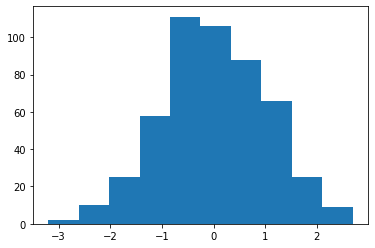

In [132]:
plt.hist(z_group["Age"])

In [133]:
fill_na_mean = lambda x:x.fillna(x.mean())

In [134]:
double_group.transform(fill_na_mean)

,Heignt,weight,Income,Age
0,165.750565,63.092173,-4.493818e+07,46.266259
1,197.196864,69.163363,-7.307872e+07,32.204619
2,216.948282,83.209979,-4.203506e+07,43.508760
3,129.731697,63.299955,-3.921895e+07,31.046349
4,190.956312,76.948306,-1.319188e+07,21.643857
...,...,...,...,...
495,174.163309,50.350194,5.987320e+07,25.493968
496,165.712671,51.168902,-2.871687e+07,44.082662
497,187.376503,75.906079,-4.383988e+07,26.939947
498,166.870255,89.110438,2.840095e+07,42.730886


### Operaciones utiles

In [135]:
double_group.head(1)

,Gender,Economic status,Heignt,weight,Income,Age
0,Female,Poor,165.750565,63.092173,-4.493818e+07,46.266259
1,Male,Poor,197.196864,69.163363,-7.307872e+07,32.204619
2,Female,Rich,216.948282,83.209979,-4.203506e+07,43.508760
4,Female,Middle Class,190.956312,76.948306,-1.319188e+07,21.643857
5,Male,Middle Class,164.792709,40.033203,2.124710e+07,22.470624
8,Male,Rich,186.797171,67.301387,-1.796244e+07,28.288318


In [136]:
double_group.tail(1)

,Gender,Economic status,Heignt,weight,Income,Age
479,Male,Rich,100.536384,40.642197,-5.124562e+07,24.041983
491,Male,Middle Class,156.345430,87.528932,-2.854887e+07,32.145358
495,Male,Poor,174.163309,50.350194,5.987320e+07,25.493968
496,Female,Rich,165.712671,51.168902,-2.871687e+07,44.082662
498,Female,Middle Class,166.870255,89.110438,2.840095e+07,42.730886
499,Female,Poor,161.586491,61.431189,2.690432e+07,22.130874


In [137]:
double_group.nth(82)

Heignt     weight        Income        Age
Gender Economic status                                                
Female Middle Class     157.946438  56.320068 -6.769530e+05  27.289347
       Poor             198.954289  69.264379  1.097338e+08  23.325502
Male   Middle Class     147.880079  94.950459  1.031932e+08  17.591625
       Rich             201.143890  92.820595  3.993849e+07  32.311150

In [138]:
data_sorted = data.sort_values(['Age','Income'])

In [139]:
data_sorted

,Gender,Economic status,Heignt,weight,Income,Age
408,Female,Rich,118.390530,67.891827,-3.991329e+07,-9.221644
95,Female,Middle Class,162.011219,17.723966,1.697902e+07,-5.806818
7,Female,Poor,127.705763,67.850661,-5.637226e+07,-3.021861
427,Female,Poor,150.358642,75.108983,-8.715459e+07,1.529809
218,Female,Middle Class,150.452722,59.424688,-3.018847e+07,2.384195
...,...,...,...,...,...,...
80,Female,Poor,189.453956,57.470317,4.898018e+07,56.611551
87,Male,Poor,127.480552,95.541633,4.427267e+07,57.003628
467,Male,Rich,168.969302,46.305465,1.710606e+08,57.143454
355,Female,Middle Class,145.571942,121.018779,3.242201e+07,58.717171


In [140]:
age_grouped = data_sorted.groupby("Gender")

In [141]:
age_grouped.head()

,Gender,Economic status,Heignt,weight,Income,Age
408,Female,Rich,118.390530,67.891827,-3.991329e+07,-9.221644
95,Female,Middle Class,162.011219,17.723966,1.697902e+07,-5.806818
7,Female,Poor,127.705763,67.850661,-5.637226e+07,-3.021861
427,Female,Poor,150.358642,75.108983,-8.715459e+07,1.529809
218,Female,Middle Class,150.452722,59.424688,-3.018847e+07,2.384195
102,Male,Rich,185.927668,120.728588,4.421211e+07,4.853252
287,Male,Rich,158.822905,45.891913,5.103330e+07,6.453965
308,Male,Middle Class,157.220181,105.585639,2.252853e+07,6.619051
319,Male,Poor,185.788174,41.815068,5.978938e+07,8.007402
106,Male,Poor,195.193351,88.039510,2.044879e+07,8.574550


In [142]:
age_grouped.head(1)

,Gender,Economic status,Heignt,weight,Income,Age
408,Female,Rich,118.390530,67.891827,-3.991329e+07,-9.221644
102,Male,Rich,185.927668,120.728588,4.421211e+07,4.853252


In [143]:
age_grouped.tail(1)

,Gender,Economic status,Heignt,weight,Income,Age
467,Male,Rich,168.969302,46.305465,1.710606e+08,57.143454
485,Female,Middle Class,185.728784,77.064938,-1.249789e+08,65.777879


## Conjunto de entrenamiento y conjunto de testing

In [144]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
len(data)

3333

### Dividir utilizando distribución normal

In [145]:
a = np.random.randn(len(data))

(array([ 25., 136., 378., 726., 941., 690., 319.,  97.,  20.,   1.]),
 array([-3.12540506, -2.41907141, -1.71273775, -1.0064041 , -0.30007044,
         0.40626321,  1.11259687,  1.81893052,  2.52526418,  3.23159783,
         3.93793148]),
 <a list of 10 Patch objects>)

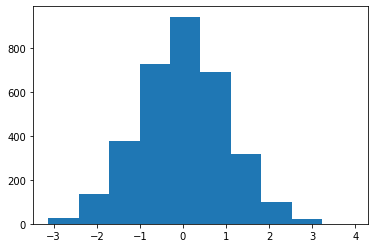

In [147]:
plt.hist(a)

In [148]:
check = (a<0.8)

In [149]:
check

array([ True,  True,  True, ..., False,  True, False])

(array([ 684.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2649.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

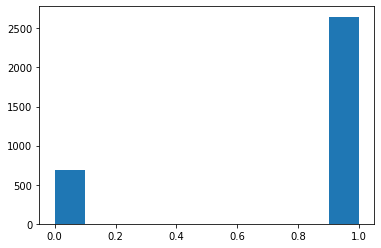

In [151]:
plt.hist(check.astype(int))

In [153]:
training = data[check]
testing = data[~check]

In [154]:
len(training)

2649

In [155]:
len(testing)

684

### Libreria Skitlearn

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
train,test = train_test_split(data,test_size=0.2)

In [158]:
len(train)

2666

In [159]:
len(test)

667

## Usar una funcion de shuffle

In [160]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [161]:
import sklearn

In [164]:
data = sklearn.utils.shuffle(data)

In [165]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [166]:
len(train_data)

2499

In [167]:
len(test_data)

833